# Lab 9 Report: 
## Final Project Codebase

## Project Title: Top Tagging with Fully Connected Networks

### Group Members: Van Tha Bik Lian, Edward

--------------------

In [1]:
import torch
import os
import pandas as pd
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.io import read_image
import matplotlib.pyplot as plt
import numpy as np
import tqdm

## Prepare Data

In [2]:
# Custom class to load in each class
class LoadDataset(Dataset):
    def __init__(self, annotations_file, event_dir, transform=None, target_transform=None):
        self.event_labels = pd.DataFrame(annotations_file)
        self.event_dir = event_dir
        self.transform = transform
        self.target_transform = target_transform

    def num_events(self):
        return len(self.event_labels) # number of events in dataset

    def getitem(self, idx):
        file = os.path.join(self.event_dir, self.event_labels.iloc[idx, 0])
        event = np.load(file, mmap_mode='r')
        if self.transform:
            event = self.transform(event)
        return event  # event, features and targets

To start we'll look at the first 100k events and split this this smaller dataset into training and validation. 80k for training and 20k for validation. We'll take the next (TBD) events after 100k as testing.

In [3]:
events_dir = 'jets/jets/'
event_names = os.listdir(events_dir)

In [4]:
# importing required packages
#from pathlib import Path
#import shutil
 
# defining source and destination
# paths
#src_path = events_dir
#trg = 'smaller_dataset'
 
#for i in tqdm.trange(0,100000):
    # copying the files to the
    # destination directory
#    shutil.copy2(src_path + event_names[i] , trg)

#### Loading dataset
> Note again we will work with the first 100k events for now (located in 'smaller_dataset' directory).

In [5]:
dataLoader = LoadDataset(os.listdir('smaller_dataset/'),'smaller_dataset/')

In [6]:
dataLoader.num_events()

100000

In [7]:
# we'll put each event into a dictionary with the keys
# are the event name/number and the values are pandas
# DataFrame with the 5 features as their columns. (features_100k)
# Another dictionary (targets_100k) that stores the truth (targets)
# as the value instead of features
event_names = os.listdir('smaller_dataset/')
features_100k = {}
targets_100k = {}
for i in tqdm.trange(0,dataLoader.num_events()):
    event = dataLoader.getitem(i)
    features = event['x']
    targets = event['y']
    
    pt = features[:,0]
    eta = features[:,1]
    phi = features[:,2]
    energy = features[:,3]
    deltaR = features[:,4]
    
    df = pd.DataFrame({'pt':pt, 'eta':eta, 'phi':phi,
                       'energy':energy, 'deltaR':deltaR})
    features_100k.update({event_names[i].rsplit( ".", 1 )[ 0 ] :df})
    targets_100k.update({event_names[i].rsplit( ".", 1 )[ 0 ] :targets})

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [06:29<00:00, 256.69it/s]


In [8]:
print(len(features_100k.keys()), len(targets_100k.keys()))

100000 100000


In [21]:
stacked_features = pd.DataFrame({'pt':[], 'eta':[], 'phi':[],
                   'energy':[], 'deltaR':[]})

,pt,eta,phi,energy,deltaR


In [23]:
df4 = pd.concat([df,df2], ignore_index=True)

In [19]:
df = pd.DataFrame({'1':[]})

In [17]:
df

""


In [11]:
features_100k['event_0000000']

,pt,eta,phi,energy,deltaR
0,0.134400,-0.000000,0.000000,0.131954,0.024059
1,0.093437,-0.010720,-0.008629,0.092622,0.011948
2,0.079025,-0.028128,-0.076542,0.082384,0.058282
3,0.064857,-0.005463,0.007246,0.063527,0.028594
4,0.054905,0.001695,-0.007219,0.054112,0.019557
...,...,...,...,...,...
60,0.000421,-0.188673,-0.124009,0.000485,0.204485
61,0.000415,0.059482,0.168258,0.000361,0.202818
62,0.000357,0.372182,0.075056,0.000295,0.391861
63,0.000291,-0.100856,-0.235333,0.000349,0.234603


#### Scaling/normalization of data
> For scaling and normalization purposes, we'll calculate the mean and standard deviation of our dataset here

In [ ]:
stacked_features = pd.DataFrame({'pt':pt, 'eta':eta, 'phi':phi,
                       'energy':energy, 'deltaR':deltaR})

#### Split data to training testing and validation
1) Extract features (X) and target labels (y) 
2) Scale features using scikit-learn provided standard scaler 
3) Split the dataset into Training (80%) and Testing (20%) 
4) Assign subset of the training dataset as validation data (same size as testing) 
5) Use the remaining dataset as training


In [55]:
feature_train = dict(list(features_100k.items())[0: 80000])
train_feat_ID = list(feature_train.keys())
feature_test = dict(list(features_100k.items())[80000: 100000])
test_feat_ID = list(feature_test.keys())

target_train = dict(list(targets_100k.items())[0: 80000])
train_tar_ID = list(target_train.keys())
target_test = dict(list(targets_100k.items())[80000: 100000])
test_tar_ID = list(target_test.keys())


In [56]:
feature_train

{'event_0000000':           pt       eta       phi    energy    deltaR
 0   0.134400 -0.000000  0.000000  0.131954  0.024059
 1   0.093437 -0.010720 -0.008629  0.092622  0.011948
 2   0.079025 -0.028128 -0.076542  0.082384  0.058282
 3   0.064857 -0.005463  0.007246  0.063527  0.028594
 4   0.054905  0.001695 -0.007219  0.054112  0.019557
 ..       ...       ...       ...       ...       ...
 60  0.000421 -0.188673 -0.124009  0.000485  0.204485
 61  0.000415  0.059482  0.168258  0.000361  0.202818
 62  0.000357  0.372182  0.075056  0.000295  0.391861
 63  0.000291 -0.100856 -0.235333  0.000349  0.234603
 64  0.000013 -0.200573 -0.163213  0.000015  0.236868
 
 [65 rows x 5 columns],
 'event_0000001':           pt           eta       phi    energy    deltaR
 0   0.415212  0.000000e+00  0.000000  0.413129  0.028499
 1   0.092896  1.120716e-02 -0.005212  0.092563  0.024770
 2   0.090561  1.106950e-02  0.003516  0.090223  0.033045
 3   0.060736  1.570434e-03  0.009881  0.060432  0.038283
 4

In [42]:
test_lis = [0, 1, 2, 3, 4]
test_lis[:3]

[0, 1, 2]

In [ ]:
training_targets = dict(list(targets_100k.items())[0: 80000])
training_ID = list(training_features.keys())
validation_features = dict(list(features_100k.items())[80000: 100000])
validation_targets = dict(list(targets_100k.items())[80000: 100000])
validation_ID = list(validation_features.keys())

In [25]:
print(len(training_features), len(validation_features))

80000 20000


In [26]:
print(len(training_targets), len(validation_targets))

80000 20000


In [27]:
print(len(training_ID), len(validation_ID))

80000 20000


In [28]:
training_features[training_ID[0]]

,pt,eta,phi,energy,deltaR
0,0.134400,-0.000000,0.000000,0.131954,0.024059
1,0.093437,-0.010720,-0.008629,0.092622,0.011948
2,0.079025,-0.028128,-0.076542,0.082384,0.058282
3,0.064857,-0.005463,0.007246,0.063527,0.028594
4,0.054905,0.001695,-0.007219,0.054112,0.019557
...,...,...,...,...,...
60,0.000421,-0.188673,-0.124009,0.000485,0.204485
61,0.000415,0.059482,0.168258,0.000361,0.202818
62,0.000357,0.372182,0.075056,0.000295,0.391861
63,0.000291,-0.100856,-0.235333,0.000349,0.234603


In [22]:
validation_features[validation_ID[0]]

,pt,eta,phi,energy,deltaR
0,3.194553e-01,-0.000000e+00,0.000000,3.195721e-01,0.002336
1,1.546708e-01,1.238520e-03,-0.003312,1.544555e-01,0.001793
2,1.407445e-01,-4.710974e-03,-0.007929,1.408952e-01,0.007161
3,1.076593e-01,-3.311797e-03,-0.001240,1.078885e-01,0.003241
4,9.126326e-02,1.940933e-03,-0.004660,9.105963e-02,0.003209
5,6.272860e-02,3.260377e-04,-0.001642,6.270847e-02,0.000895
6,4.124229e-02,1.529908e-02,0.003456,4.089794e-02,0.016593
7,3.029445e-02,5.788818e-03,-0.005385,3.014638e-02,0.006777
8,1.182204e-02,-8.348101e-04,-0.007865,1.180558e-02,0.005573
9,8.608549e-03,-2.733162e-02,-0.017788,8.719101e-03,0.031179


NOTE: for scaling, stack data and scale for each feature

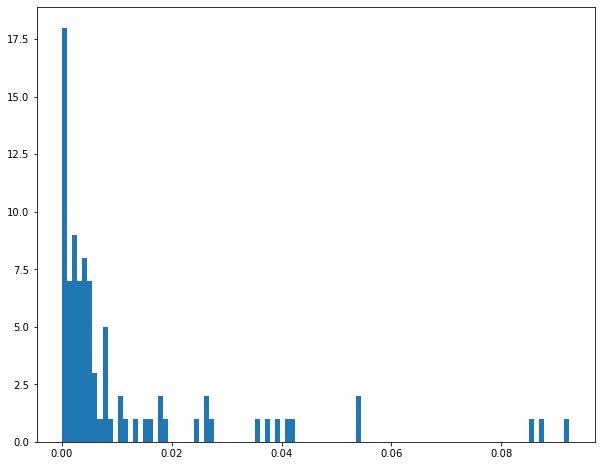

In [23]:
plt.figure(figsize=(10,8))
plt.hist(training_features[training_ID[100]]['pt'],bins=100)
plt.show()

## Define Model

## Define Hyperparameters

## Identify Tracked Values

## Train Model

## Visualize & Evaluate Model